# Package Installation

In [ ]:
!pip install -q datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.5/268.5 kB 15.8 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset, concatenate_datasets, load_from_disk, load_metric, Dataset, ClassLabel
import numpy as np
import pandas as pd

In [ ]:
! pip install -U "neptune[tensorflow-keras]" tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.3/455.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.9/135.9 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 58.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 71.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Load dataset

In [ ]:
# Load the parquet dataset
dataset = load_dataset("parquet", data_files={'train': '/content/drive/MyDrive/Dissertation/Data/train_df.parquet',
                                             'test': '/content/drive/MyDrive/Dissertation/Data/test_df.parquet'})
train_df = dataset['train']
test_df = dataset['test']

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/parquet/default-c72183ae075bf112/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
train_df = dataset['train']
test_df = dataset['test']

# Word Vectorization

# Count Vectorizer (BOW)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#Split x and y variable of each dataset
x_test = test_df['processed_text']
y_test = test_df['label_cat']
x_train = train_df['processed_text']
y_train = train_df['label_cat']

In [ ]:
# Number of total unique words (features) inthe the dataset
def count_unique(sample_list):
  total_words = []
  for i in sample_list:
    total_words.append(i.split(' '))
  return total_words
total_sentences = x_train + x_test
total_words = count_unique(total_sentences)

In [ ]:
#ref: https://towardsdatascience.com/another-twitter-sentiment-analysis-with-python-part-4-count-vectorizer-b3f4944e51b5
def count_unique(word_list):
  unique_word = []
  for i in range(len(word_list)):
    word = word_list[i]
    for y in word:
      if y not in unique_word:
        unique_word.append(y)
    i+=1
  return unique_word
unique_list = count_unique(total_words)

In [ ]:
from sklearn.metrics import f1_score
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    accuracy = f1_score(y_test, y_pred,average= 'weighted')
    return accuracy

In [ ]:
cvec = CountVectorizer()
lr = LogisticRegression
n_features = np.arange(100,len(unique_list),10)
def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, ngram_range=(1,1), classifier=lr):
    result = []
    for n in n_features:
        vectorizer.set_params(max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        nfeature_accuracy = accuracy_summary(checker_pipeline, x_train.todense(), y_train, x_test, y_test)
        result.append((n,nfeature_accuracy))
    return result

In [ ]:
sample_score_1gram = nfeature_accuracy_checker(ngram_range=(1, 1))
sample_score_2gram = nfeature_accuracy_checker(ngram_range=(1, 2))
sample_score_3gram = nfeature_accuracy_checker(ngram_range=(1, 3))

AttributeError: ignored

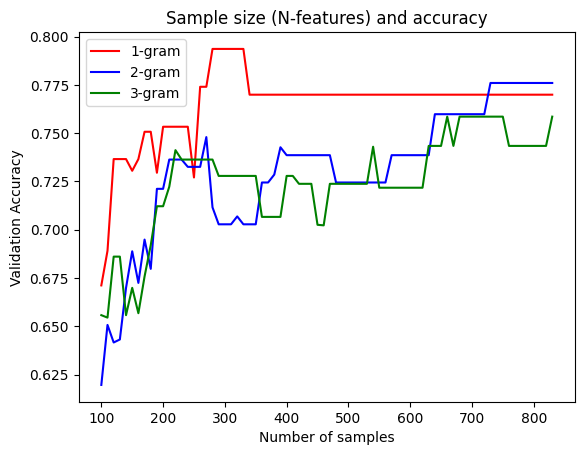

In [ ]:
# Visulisation of accuracy and samples size (n_features)
def plot(list_sample):
  sample_size_plot = []
  sample_accuracy_plot = []
  for i in list_sample:
    sample_size_plot.append(i[0])
    sample_accuracy_plot.append(i[1])
  return sample_size_plot, sample_accuracy_plot
#import packages
import matplotlib.pyplot as plt
x_1gram, y_1gram = plot(sample_score_1gram)
x_2gram, y_2gram = plot(sample_score_2gram)
x_3gram, y_3gram = plot(sample_score_3gram)
plt.plot(x_1gram,y_1gram,color='r',label='1-gram')
plt.plot(x_2gram,y_2gram,color='b',label='2-gram')
plt.plot(x_3gram,y_3gram,color='g',label='3-gram')
plt.title('Sample size (N-features) and accuracy-CounterVec')
plt.xlabel('Number of samples')
plt.ylabel('Validation Weighted f1-score')
plt.legend()
plt.show()
'''
It is deduced that 1-gram achieved the best validation accuracy at 0.79 with a sample size of 300 samples

## TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tidf_vec = TfidfVectorizer()
sample_score_tidf_1gram = nfeature_accuracy_checker(vectorizer = tidf_vec , ngram_range=(1, 1))
sample_score_tidf_2gram = nfeature_accuracy_checker(vectorizer = tidf_vec , ngram_range=(1, 2))
sample_score_tidf_3gram = nfeature_accuracy_checker(vectorizer = tidf_vec , ngram_range=(1, 3))

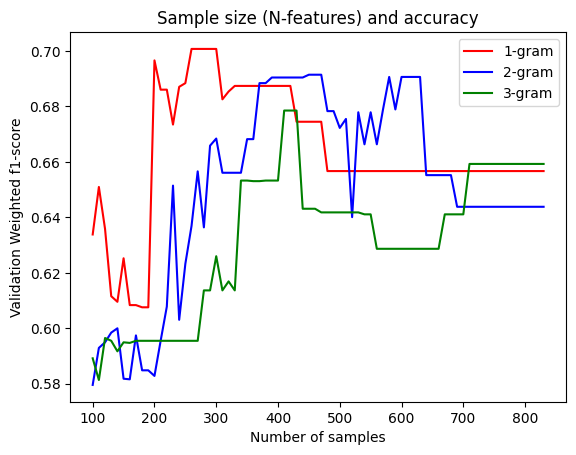

In [ ]:
# Visualisation
x_1gram, y_1gram = plot(sample_score_tidf_1gram)
x_2gram, y_2gram = plot(sample_score_tidf_2gram)
x_3gram, y_3gram = plot(sample_score_tidf_3gram )
plt.plot(x_1gram,y_1gram,color='r',label='1-gram')
plt.plot(x_2gram,y_2gram,color='b',label='2-gram')
plt.plot(x_3gram,y_3gram,color='g',label='3-gram')
plt.title('Sample size (N-features) and accuracy-TIDF')
plt.xlabel('Number of samples')
plt.ylabel('Validation Weighted f1-score')
plt.legend()
plt.show()
#it is shown that 1-gram still outperforms bi-gram or tri-gram with a highest accuracy of 0.7

# Validate against other algorithms
REF: https://towardsdatascience.com/another-twitter-sentiment-analysis-with-python-part-5-50b4e87d9bdd

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import NearestCentroid
from sklearn.feature_selection import SelectFromModel
names = ["Logistic Regression", "Linear SVC", "LinearSVC with L1-based feature selection","Multinomial NB",
         "Bernoulli NB", "Ridge Classifier", "AdaBoost", "Perceptron","Passive-Aggresive", "Nearest Centroid"]
classifiers = [
    LogisticRegression(),
    LinearSVC(),
    Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))),
  ('classification', LinearSVC(penalty="l2"))]),
    MultinomialNB(),
    BernoulliNB(),
    RidgeClassifier(),
    AdaBoostClassifier(),
    Perceptron(),
    PassiveAggressiveClassifier(),
    NearestCentroid()
    ]
zipped_clf = zip(names,classifiers)

tvec = TfidfVectorizer()
def classifier_comparator(vectorizer=tvec, n_features=300, ngram_range=(1, 1), classifier=zipped_clf):
    result = []
    vectorizer.set_params(max_features=n_features, ngram_range=ngram_range)
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', c)
        ])
        clf_accuracy = accuracy_summary(checker_pipeline, x_train, y_train, x_test, y_test)
        result.append((n,clf_accuracy))
    return result

result = classifier_comparator()

In [ ]:
result

[('Logistic Regression', 0.7007575757575758),
 ('Linear SVC', 0.8612573099415205),
 ('LinearSVC with L1-based feature selection', 0.8234506721348827),
 ('Multinomial NB', 0.576945126945127),
 ('Bernoulli NB', 0.2567611599869664),
 ('Ridge Classifier', 0.8446627933470039),
 ('AdaBoost', 0.0639269406392694),
 ('Perceptron', 0.6724747474747474),
 ('Passive-Aggresive', 0.8213564213564214),
 ('Nearest Centroid', 0.8467893217893218)]

# Doc2Vec
ref： https://towardsdatascience.com/multi-class-text-classification-with-doc2vec-logistic-regression-9da9947b43f4

In [ ]:
! pip install gensim

In [ ]:
# Import packages
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from sklearn import utils
from nltk.tokenize import word_tokenize

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Tag sentences
train_df_pd = train_df.to_pandas()
test_df_pd = test_df.to_pandas()
train_tagged = train_df_pd.apply(
    lambda r:TaggedDocument(words=word_tokenize(r['processed_text']), tags=str(r['label_cat'])), axis=1)
test_tagged = test_df_pd.apply(
    lambda r:TaggedDocument(words=word_tokenize(r['processed_text']), tags=str(r['label_cat'])), axis=1)

## DBOW

In [ ]:
# Build vocabulary
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0)
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 261/261 [00:00<00:00, 269633.83it/s]


In [ ]:
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 261/261 [00:00<00:00, 661458.21it/s]


In [ ]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words)) for doc in sents])
    return targets, regressors

In [ ]:
# Train using logistic regression before
y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)

In [ ]:
# Compute f1-score
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
f1_score(y_test, y_pred, average='weighted')

0.27751196172248804

## DM

In [ ]:
model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, negative=5, min_count=2,
                    alpha=0.01, min_alpha=0.0001,epochs=6)
model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 261/261 [00:00<00:00, 275538.22it/s]


In [ ]:
y_train, X_train = vec_for_learning(model_dmm , train_tagged)
y_test, X_test = vec_for_learning(model_dmm , test_tagged)
# Compute f1-score
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
f1_score(y_test, y_pred, average='weighted')

0.2840909090909091

# Deep learning methods

## CNN

In [ ]:
# Import modules
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Use countervectorizer
cvec = CountVectorizer()
cvec.set_params(max_features=300, ngram_range=(1,1))

CountVectorizer(max_features=300)

In [ ]:
# Define batch size and train&validation steps based on size of training data
batch_size = 8
train_steps = int(len(train_df)/batch_size)
val_steps = int(len(test_df)/batch_size)

In [ ]:
# Set input-dimension
input_dim = len(unique_list) # Number of unique

In [ ]:
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=input_dim, output_dim=64, mask_zero=True),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPool1D(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='softmax')
])

In [ ]:
# Model Summary
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          53568     
                                                                 
 conv1d (Conv1D)             (None, None, 64)          20544     
                                                                 
 max_pooling1d (MaxPooling1  (None, None, 64)          0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, None, 64)          20544     
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 32)                2

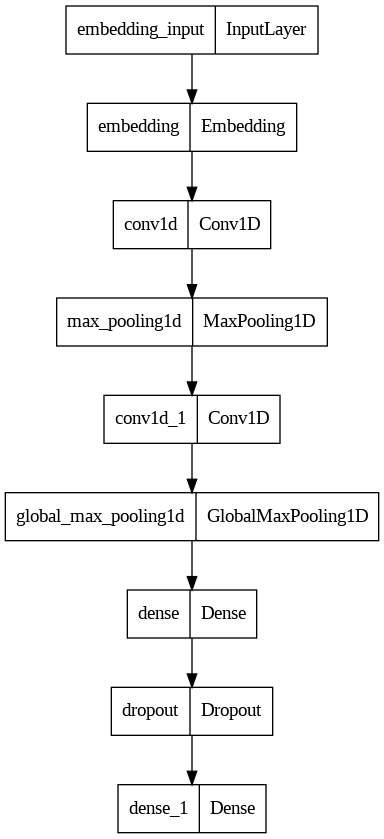

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_cnn)

In [ ]:
# Encoding
encoded_x_train = cvec.fit_transform(x_train).toarray()
encoded_x_test = cvec.fit_transform(x_test).toarray()

In [ ]:
# converting list to array
'''
These lines are only useful when values in y_train and y_test are string,
y_train = [eval(i) for i in y_train],
y_test = [eval(i) for i in y_test]
'''
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
# compile the model
model_cnn.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['Precision'])

In [ ]:
# Log to neptune
import neptune
run = neptune.init_run(
    custom_run_id="CNN",
    project="dducl/Dissertation-Deeplearning",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI2ZmViNmNiNy1hYmFiLTRhOWYtYjA3NC02NDRhYjJmZjUxODcifQ==",
)

https://app.neptune.ai/dducl/Dissertation-Deeplearning/e/DEEPLEARN-2


In [ ]:
# Train the first CNN model
from neptune.integrations.tensorflow_keras import NeptuneCallback
neptune_cbk = NeptuneCallback(run=run)
history_cnn = model_cnn.fit(encoded_x_train,
                    y_train,
                    epochs=25,
                    shuffle = True,
                    steps_per_epoch=train_steps,
                    #callbacks=[neptune_cbk]
)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(9, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


32/32 [==============================] - 2s 18ms/step - loss: 0.0000e+00 - precision: 0.9549
Epoch 2/25
32/32 [==============================] - 1s 20ms/step - loss: 0.0000e+00 - precision: 0.9653
Epoch 3/25
32/32 [==============================] - 1s 20ms/step - loss: 0.0000e+00 - precision: 0.9583
Epoch 4/25
32/32 [==============================] - 1s 20ms/step - loss: 0.0000e+00 - precision: 0.9653
Epoch 5/25
32/32 [==============================] - 1s 20ms/step - loss: 0.0000e+00 - precision: 0.9583
Epoch 6/25
32/32 [==============================] - 1s 20ms/step - loss: 0.0000e+00 - precision: 0.9757
Epoch 7/25
32/32 [==============================] - 1s 19ms/step - loss: 0.0000e+00 - precision: 0.9549
Epoch 8/25
32/32 [==============================] - 1s 20ms/step - loss: 0.0000e+00 - precision: 0.9618
Epoch 9/25
32/32 [==============================] - 1s 27ms/step - loss: 0.0000e+00 - precision: 0.9583
Epoch 10/25
32/32 [==============================] - 1s 32ms/step - loss: 0

32/32 [==============================] - 1s 22ms/step - loss: 0.0000e+00 - precision: 0.9735


In [ ]:
# stop logging
run.stop()

Shutting down background jobs, please wait a moment...
Done!
All 0 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/dducl/Dissertation-Deeplearning/e/DEEPLEARN-2/metadata


In [ ]:
# Evaluate the model
loss, accuracy = model_cnn.evaluate(encoded_x_test, y_test,steps=val_steps)
#print('Accuracy: %f' % (accuracy*100))

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 2s 29ms/step - loss: 0.0000e+00 - precision: 0.9545


In [ ]:
# Save model
model_cnn.save('/content/drive/MyDrive/Dissertation/Deep_Learning/model_cnn.keras')

# CNN+ LSTM

In [ ]:
vocab_size = len(unique_list)
embedding_vector_length = 64
input_length = 300 # This is equal to the n_feature of count-vectorisation

In [ ]:
# Same fixture but an LSTM layer is added after the maxpooling layer
model_cnn_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_vector_length, input_length=input_length),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.LSTM(100),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='softmax')
])

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 300, 64)           53568     
                                                                 
 conv1d_16 (Conv1D)          (None, 296, 64)           20544     
                                                                 
 max_pooling1d_13 (MaxPooli  (None, 148, 64)           0         
 ng1D)                                                           
                                                                 
 lstm_17 (LSTM)              (None, 100)               66000     
                                                                 
 dense_22 (Dense)            (None, 32)                3232      
                                                                 
 dropout_11 (Dropout)        (None, 32)                0         
                                                     

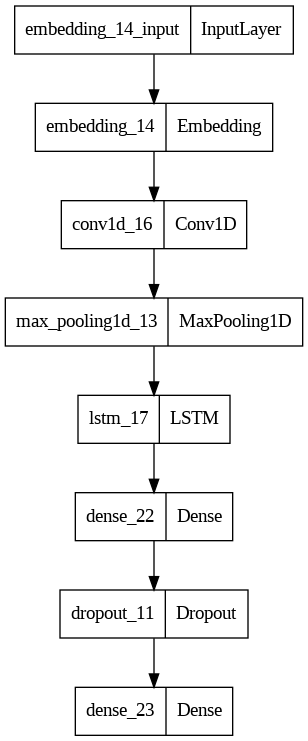

In [ ]:
#Show model
print(model_cnn_lstm.summary())
plot_model(model_cnn_lstm)

In [ ]:
# compile the model
model_cnn_lstm.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['Precision'])

In [ ]:
# Train the first CNN model
#from neptune.integrations.tensorflow_keras import NeptuneCallback
run_lstm = neptune.init_run(
    custom_run_id="CNN_LSTM",
    project="dducl/Dissertation-Deeplearning",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI2ZmViNmNiNy1hYmFiLTRhOWYtYjA3NC02NDRhYjJmZjUxODcifQ==",
)
neptune_cbk = NeptuneCallback(run=run_lstm)
history_lstm = model_cnn_lstm.fit(encoded_x_train,
                    y_train,
                    epochs=25,
                    shuffle = True,
                    steps_per_epoch=train_steps,
                    callbacks=[neptune_cbk]
)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(9, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


32/32 [==============================] - 10s 123ms/step - loss: 0.0000e+00 - precision: 0.9653
Epoch 2/25
32/32 [==============================] - 4s 115ms/step - loss: 0.0000e+00 - precision: 0.9583
Epoch 3/25
32/32 [==============================] - 3s 92ms/step - loss: 0.0000e+00 - precision: 0.9618
Epoch 4/25
32/32 [==============================] - 5s 172ms/step - loss: 0.0000e+00 - precision: 0.9618
Epoch 5/25
32/32 [==============================] - 5s 150ms/step - loss: 0.0000e+00 - precision: 0.9653
Epoch 6/25
32/32 [==============================] - 3s 95ms/step - loss: 0.0000e+00 - precision: 0.9618
Epoch 7/25
32/32 [==============================] - 4s 111ms/step - loss: 0.0000e+00 - precision: 0.9549
Epoch 8/25
32/32 [==============================] - 3s 88ms/step - loss: 0.0000e+00 - precision: 0.9688
Epoch 9/25
32/32 [==============================] - 4s 116ms/step - loss: 0.0000e+00 - precision: 0.9583
Epoch 10/25
32/32 [==============================] - 5s 166ms/step -

32/32 [==============================] - 3s 96ms/step - loss: 0.0000e+00 - precision: 0.9735


In [ ]:
# Stop run
run_lstm.stop()

Shutting down background jobs, please wait a moment...
Done!
All 0 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/dducl/Dissertation-Deeplearning/e/DEEPLEARN-3/metadata


In [ ]:
# Evaluate the model
loss, precision = model_cnn_lstm.evaluate(encoded_x_test, y_test,steps=val_steps)
print('Precision: %f' % (precision*100))

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 1s 21ms/step - loss: 0.0000e+00 - precision: 0.9545
Precision: 95.454544


In [ ]:
# Save model
model_cnn_lstm.save('/content/drive/MyDrive/Dissertation/Deep_Learning/model_cnn_lstm.keras')

# CNN-Bidirectional LSTM

In [ ]:
# Same fixture but an LSTM layer is added after the maxpooling layer
model_cnn_Bilstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_vector_length, input_length=input_length),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='softmax')
])

In [ ]:
# Compile model
model_cnn_Bilstm.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['Precision'])

# Train model
run_Bilstm = neptune.init_run(
    custom_run_id="CNN_BiLSTM",
    project="dducl/Dissertation-Deeplearning",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI2ZmViNmNiNy1hYmFiLTRhOWYtYjA3NC02NDRhYjJmZjUxODcifQ==",
)
neptune_cbk = NeptuneCallback(run=run_Bilstm)

history_BiLSTM = model_cnn_Bilstm.fit(encoded_x_train,
                    y_train,
                    epochs=25,
                    shuffle = True,
                    steps_per_epoch=train_steps,
                    callbacks=[neptune_cbk]
)

https://app.neptune.ai/dducl/Dissertation-Deeplearning/e/DEEPLEARN-4
Epoch 1/25


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(9, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


32/32 [==============================] - 12s 157ms/step - loss: 0.0000e+00 - precision: 0.9653
Epoch 2/25
32/32 [==============================] - 7s 224ms/step - loss: 0.0000e+00 - precision: 0.9514
Epoch 3/25
32/32 [==============================] - 7s 212ms/step - loss: 0.0000e+00 - precision: 0.9653
Epoch 4/25
32/32 [==============================] - 5s 145ms/step - loss: 0.0000e+00 - precision: 0.9722
Epoch 5/25
32/32 [==============================] - 6s 178ms/step - loss: 0.0000e+00 - precision: 0.9479
Epoch 6/25
32/32 [==============================] - 7s 229ms/step - loss: 0.0000e+00 - precision: 0.9688
Epoch 7/25
32/32 [==============================] - 7s 225ms/step - loss: 0.0000e+00 - precision: 0.9618
Epoch 8/25
32/32 [==============================] - 6s 178ms/step - loss: 0.0000e+00 - precision: 0.9549
Epoch 9/25
32/32 [==============================] - 8s 263ms/step - loss: 0.0000e+00 - precision: 0.9688
Epoch 10/25
32/32 [==============================] - 7s 208ms/ste

32/32 [==============================] - 6s 192ms/step - loss: 0.0000e+00 - precision: 0.9683


In [ ]:
# Stop run
run_Bilstm.stop()

Shutting down background jobs, please wait a moment...
Done!
All 0 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/dducl/Dissertation-Deeplearning/e/DEEPLEARN-4/metadata


In [ ]:
# Evaluate the model
loss, precision = model_cnn_Bilstm.evaluate(encoded_x_test, y_test,steps=val_steps)
print('Precision: %f' % (precision*100))

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 1s 27ms/step - loss: 0.0000e+00 - precision: 0.9545
Precision: 95.454544


In [ ]:
# Save model
model_cnn_Bilstm.save('/content/drive/MyDrive/Dissertation/Deep_Learning/model_cnn_Bilstm.keras')

# Visualisation

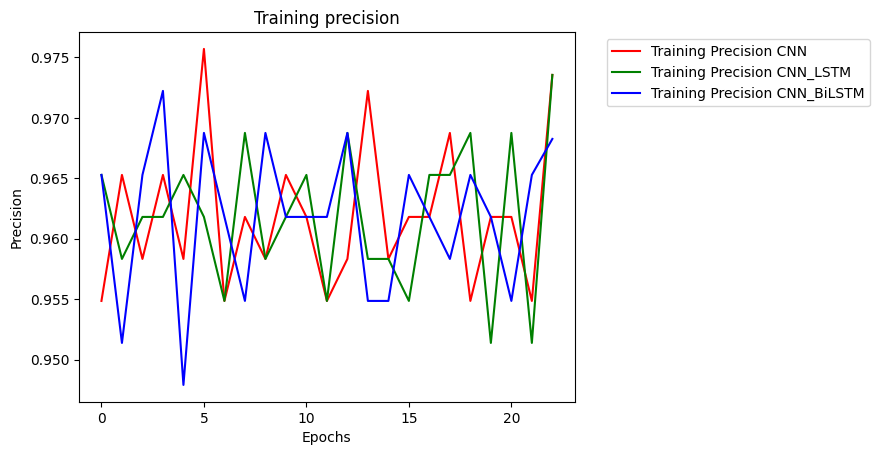

In [ ]:
from matplotlib import pyplot as plt
def plot_precision(history):
  model_history = history.history
  acc = model_history['precision']
  epochs = history.epoch
  return acc, epochs

cnn_acc,cnn_epochs = plot_precision(history_cnn)
cnn_lstm_acc, cnn_lstm_epochs = plot_precision(history_lstm)
cnn_bilstm_acc, cnn_bilstm_epochs = plot_precision(history_BiLSTM)
plt.plot(cnn_epochs, cnn_acc, 'r', label='Training Precision CNN')
plt.plot(cnn_lstm_epochs, cnn_lstm_acc, 'g', label='Training Precision CNN_LSTM')
plt.plot(cnn_bilstm_epochs, cnn_bilstm_acc, 'b', label='Training Precision CNN_BiLSTM')
plt.title('Training precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()